# Modeling and Simulation in Python

Chapter 10

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

### Under the hood

To get a `DataFrame` and a `Series`, I'll read the world population data and select a column.

`DataFrame` and `Series` contain a variable called `shape` that indicates the number of rows and columns.

In [2]:
def read_table(table, cols, url = 'https://raw.githubusercontent.com/AllenDowney/ModSimPy/master/data/World_population_estimates.html'):
    tables = pd.read_html(url, header=0, index_col=0, decimal='M')
    table = tables[table]
    table.columns = cols
    return table

In [3]:
columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
table2 = read_table(2, columns)
table2.shape

(67, 11)

In [4]:
census = table2.census / 1e9
census.shape

(67,)

In [5]:
un = table2.un / 1e9
un.shape

(67,)

A `DataFrame` contains `index`, which labels the rows.  It is an `Int64Index`, which is similar to a NumPy array.

In [6]:
table2.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

And `columns`, which labels the columns.

In [7]:
table2.columns

Index(['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj',
       'thomlinson', 'durand', 'clark'],
      dtype='object')

And `values`, which is an array of values.

In [8]:
table2.values[:2]

array([[2557628654, 2516000000.0, 2525149000.0, 2544000000.0,
        2527960000.0, 2400000000.0, 2527000000.0, 2500000000.0,
        2400000000.0, nan, 2486000000.0],
       [2594939877, nan, 2572850917.0, 2571663000.0, nan, nan, nan, nan,
        nan, nan, nan]], dtype=object)

A `Series` does not have `columns`, but it does have `name`.

In [9]:
census.name

'census'

It contains `values`, which is an array.

In [10]:
census.values[:3]

array([2.55762865, 2.59493988, 2.63677231])

And it contains `index`:

In [11]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

If you ever wonder what kind of object a variable refers to, you can use the `type` function.  The result indicates what type the object is, and the module where that type is defined.

`DataFrame`, `Int64Index`, `Index`, and `Series` are defined by Pandas.

`ndarray` is defined by NumPy.

In [12]:
type(table2)

pandas.core.frame.DataFrame

In [13]:
type(table2.index)

pandas.core.indexes.numeric.Int64Index

In [14]:
type(table2.columns)

pandas.core.indexes.base.Index

In [15]:
type(table2.values)

numpy.ndarray

In [16]:
type(census)

pandas.core.series.Series

In [17]:
type(census.index)

pandas.core.indexes.numeric.Int64Index

In [18]:
type(census.values)

numpy.ndarray

## Optional exercise

The following exercise provides a chance to practice what you have learned so far, and maybe develop a different growth model.  If you feel comfortable with what we have done so far, you might want to give it a try.

**Optional Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

Select `tables[1]`, which is the second table on the page.

Again, we'll replace the long column names with more convenient abbreviations.

In [19]:
cols = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']
table1 = read_table(1, cols)
table1.shape

(46, 10)

Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

In [20]:
table1.tail()

,PRB,UN,Maddison,HYDE,Tanton,Biraben,McEvedy & Jones,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [21]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

Here are the results.  Notice that we are working in millions now, not billions.

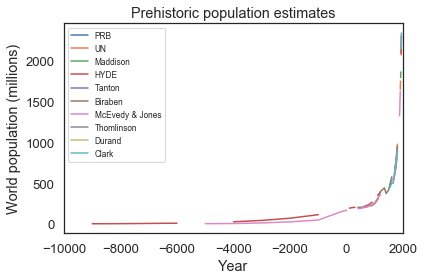

In [22]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small');

We can use `xlim` to zoom in on everything after Year 0.

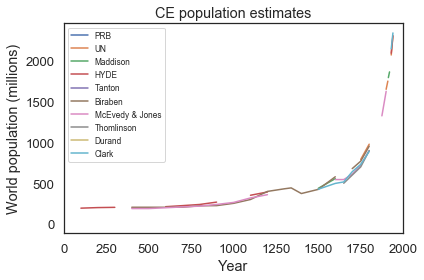

In [23]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')
plt.legend(fontsize='small');

See if you can find a model that fits these data well from Year 0 to 1950.

How well does your best model predict actual population growth from 1950 to the present?

#### I'll use the Hyde numbers, since they are the fullest for the years in question.

In [24]:
# Solution goes here
modern = table1.loc[1:]
hyde = pd.DataFrame(modern.HYDE[~pd.isna(modern.HYDE)])

,HYDE
Year,
100,195.0
200,202.0
300,205.0
400,209.0
600,213.0
700,226.0
800,240.0
900,269.0
1100,353.0


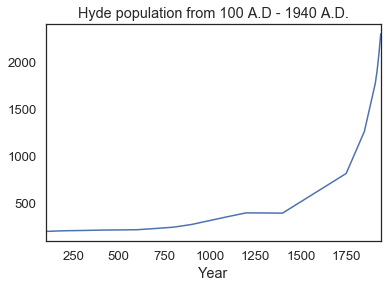

In [25]:
hyde.HYDE.plot(title="Hyde population from 100 A.D - 1940 A.D.");

In [26]:
def update_func_exp(pop, alpha, exp):
    """Update population based on an exponential model"""
    return pop + alpha * pop**exp

In [27]:
def exp_sim(steps, pop0, alpha, exp):
    """Simulate exponential pop growth for a given number of steps"""
    pops = [pop0]
    for _ in range(steps):
        pops.append(update_func_exp(pops[-1], alpha, exp))
    return pops

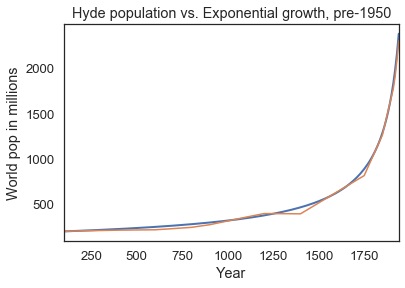

In [28]:
start_yr = 100
end_yr = 1940
num_decades = int((end_yr - start_yr) / 10)
years = np.linspace(start_yr, end_yr, num_decades+1)
alpha = .0000032  # trial and error
exp = 2.35        # trial and error
es = exp_sim(num_decades, hyde.loc[start_yr, 'HYDE'], alpha, exp)
plot(years, es)
hyde.HYDE.plot()
plt.ylabel("World pop in millions")
plt.title("Hyde population vs. Exponential growth, pre-1950");

#### Now see how those fitted parameters project to 1950-2000

In [29]:
newHyde = pd.DataFrame(table2.hyde[~pd.isna(table2.hyde)] / 1e6)

,hyde
Year,
1950,2527.96
1960,3042.00
1970,3710.00
1973,3923.00
1980,4461.00
1990,5308.00
2000,6145.00


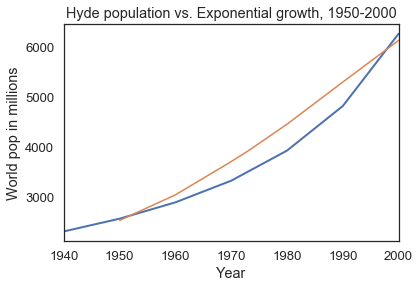

In [30]:
# params from above:
alpha = alpha
exp = exp
preds = exp_sim(steps=6, pop0=hyde.loc[1940, 'HYDE'], alpha=alpha, exp=exp)
years = np.linspace(1940, 2000, 7)
plot(years, preds)
newHyde.hyde.plot()
plt.ylabel("World pop in millions")
plt.title("Hyde population vs. Exponential growth, 1950-2000");

#### While the simple exponential growth model fits the Hyde numbers very well up to 1940, its projections into 1950-2000 don't accurately reflect how exponential growth has slowed since then and will continue to slow.

To do:  Try fitting a scaled sigmoid curve to the numbers, since growth is no longer so exponential, and we appear to be at about half capacity right now.